In [1]:
### Import Packages ###
import os
import numpy as np
import math as math
import pandas as pd
import random as random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

### Local Packages ###
from utils.Main import *
from utils.Selector import *
from utils.Auxiliary import *
from utils.Prediction import *

In [2]:
### Get Directory ###
cwd = os.getcwd()
ParentDirectory = os.path.abspath(os.path.join(cwd, ".."))

### DataType ###
DataFileInput = "COMPAS"

# One Iteration

## Inputs

In [3]:
i=1
TopCModels = 50
Seed = 1
TestProportion = 0.99
CandidateProportion = 0.7
SelectorType = RashomonQBCFunction
ModelType = TreeFarmsFunction
DataArgs = {}
ModelArgs = {"TopCModels": TopCModels, "config" : {"regularization": 0.01, "rashomon_bound_multiplier": 0.05}, "Type":"Classification"}
SelectorArgs = {"TopCModels": 10}


## One Iteration Function

### Set Up

In [4]:
### Run Time ###
StartTime = time.time()

### Set Up ###
random.seed(Seed)
np.random.seed(Seed)
ErrorVec = []
SelectedObservationHistory = []

### Load Data

In [5]:
### Generate Data ###
if(DataFileInput == "Simulate"):
    from utils.Main import DataGeneratingProcess                             ### NOTE: Why is this not imported from utils.Main import *
    df = DataGeneratingProcess(**DataArgs)
else:
    df = LoadData(DataFileInput)

### Train Test Split

In [6]:
### Train Test Candidate Split
from utils.Main import TrainTestCandidateSplit                           ### NOTE: Why is this not imported from utils.Main import *
df_Train, df_Test, df_Candidate = TrainTestCandidateSplit(df, TestProportion, CandidateProportion)

In [7]:
### Model Arguments ###
ModelArgs['df_Train'] = df_Train
ModelArgsFiltered = FilterArguments(ModelType, ModelArgs)

### Argument Processing

In [8]:
### Selector Arguments ###
SelectorArgs["df_Train"] = df_Train
SelectorArgs["df_Candidate"] = df_Candidate
SelectorArgs["Model"] = ""
SelectorArgsFiltered = FilterArguments(SelectorType, SelectorArgs)

# Learning Process Function

In [9]:
### Set Up ###
ErrorVec = []
SelectedObservationHistory = []
ModelArgsFiltered = FilterArguments(ModelType, ModelArgs)
SelectorArgsFiltered = FilterArguments(SelectorType, SelectorArgs)

## Iteration

In [11]:
ErrorVec

[0.3802281368821293]

In [15]:
df_Test.shape

(6838, 13)

In [14]:
df_Train.shape

(21, 13)

In [10]:
for i in range(0,5):
    ### Prediction Model ###
    print("Iteration: " + str(i))
    Model = ModelType(**ModelArgsFiltered)
    if "Model" in SelectorArgsFiltered.keys(): SelectorArgsFiltered['Model'] = Model            # NOTE: THIS IS NOT DYNAMIC

    ### Current Error ###
    TestErrorVal = TestErrorFunction(Model, df_Test, ModelArgs["Type"])
    if(len(TestErrorVal) > 1):
        AllErrors = TestErrorVal                                                # Rashomon gives all errors of Rashomon
        CurrentError = float(np.min(AllErrors))                                 # Extract the best one
        SelectorArgsFiltered["AllErrors"] = AllErrors                                   # Use AllErrors in RashomonQBC
    else: 
        CurrentError = TestErrorVal                                             # One output for non-Rashomon
    ErrorVec.append(CurrentError)


    ### Sampling Procedure ###
    QueryObservationIndex = SelectorType(**SelectorArgsFiltered)
    QueryObservation = df_Candidate.loc[[QueryObservationIndex]] # or should this be iloc
    SelectedObservationHistory.append(QueryObservationIndex)

    ### Update Train and Candidate Sets ###
    df_Train = pd.concat([df_Train, QueryObservation])
    df_Candidate = df_Candidate.drop(QueryObservationIndex)

    ### Update SelectorArgs and ModelArgs ###                                     # NOTE: THIS IS NOT DYNAMIC
    if "df_Train" in ModelArgsFiltered.keys(): ModelArgsFiltered['df_Train'] = df_Train
    if "df_Train" in SelectorArgsFiltered.keys(): SelectorArgsFiltered['df_Train'] = df_Train
    if "df_Candidate" in SelectorArgsFiltered.keys(): SelectorArgsFiltered['df_Candidate'] = df_Candidate     

Iteration: 0
null
Finding Optimal Objective...
{
  "false": {
    "false": {
      "complexity": 0.009999999776482582,
      "loss": 0.05000000074505806,
      "name": "Y",
      "prediction": 0
    },
    "feature": 4,
    "name": "age:<46",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "Y",
          "prediction": 0
        },
        "feature": 7,
        "name": "juvenile-crimes:=0",
        "reference": 1,
        "relation": "==",
        "true": {
          "false": {
            "complexity": 0.009999999776482582,
            "loss": 0.0,
            "name": "Y",
            "prediction": 0
          },
          "feature": 3,
          "name": "age:<26",
          "reference": 1,
          "relation": "==",
          "true": {
            "complexity": 0.009999999776482582,
            "loss": 0.05000000074505806,
            "name": "Y",
       

KeyboardInterrupt: 

In [16]:
import numpy as np
test = np.load("/Users/simondn/Documents/RashomonActiveLearning/Results/COMPAS/TreeFarms/Raw/Seed0_DataCOMPAS_TP0.7_CP0.8_ST_RASHOMON_Yes.npy")

In [22]:
len(test[0])

1658

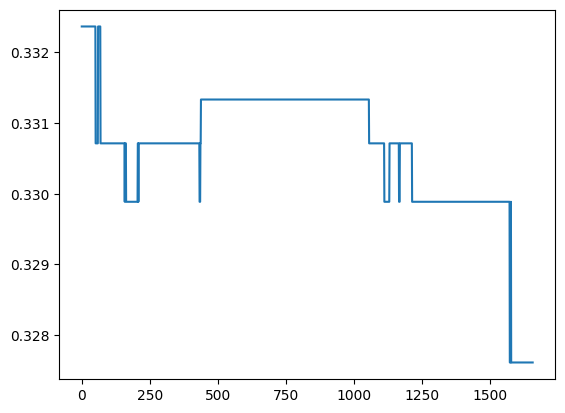

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(test[0])), test[0])